# CONTACT MAPS CALCULATION AND ANALYSIS

In [ ]:
import pandas as pd
import structure_validation
import structural_analysis
import contact_maps
import importlib

In [2]:
df_allsp = pd.read_csv("/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.varalign/prointvar_analysis_data/anks_final_aln.sto_prointvar_structure_table_with_validation.csv")
aln_in = "/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/anks_final_aln.sto"
aln_fmt = "stockholm"

2020-06-09 12:07:26,296 - WARNING - /cluster/gjb_lab/2394007/miniconda/envs/myenv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (1,14,15,18,19,25,26,28,29,31,32,33,41,42,43,44,45,46,47,48,51,52,63,65,67,69,71,75,77,90,91,95,113,114,115,118,119,122,123,128,129,132,133,142,143,149,151,153,154,155,156,157,161,163,169,206,208,226,227,228,229,230,239,269,272,276,278,279,283,299,300,303,307,309,310) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
 


In [4]:
df_allsp_rsrz_filt = structure_validation.filter_rsrz_rscc(df_allsp)
cons_cols_allsp = structural_analysis.get_cons_cols(aln_in, aln_fmt)
df_rf = contact_maps.format_df(df_allsp_rsrz_filt, cons_cols_allsp)

cons_cols_eq = contact_maps.get_cons_cols_eq(cons_cols_allsp)
df_cols_eq = contact_maps.get_df_cols_eq(df_rf)

2020-06-09 12:08:03,188 - WARNING - /cluster/gjb_lab/2394007/miniconda/envs/myenv/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
 
2020-06-09 12:08:03,626 - WARNING - /homes/2394007/contact_maps.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_cons["Alignment_column_cons_A"] = df2_cons.Alignment_column_A.map(cons_cols_eq)
 
2020-06-09 12:08:03,629 - WARNING - /homes/2394007/contact_maps.py:23: SettingWithCopyWarning: 
A value i

## INTRA-ANK REPEAT INTERACTIONS

In [6]:
intra_res_occ = contact_maps.get_intra_cons_occ(df_rf, cons_cols_eq)

The dataframe contains information of:
36268 residues, 9991 of which are unique
158 PDB structures
69 different proteins
358 unique repeats


In [7]:
intra = contact_maps.get_intra_cons(df_rf, cons_cols_eq, t = 0)#, int_mask = "'Hydrogen-Bond'")
intra_norm = contact_maps.normalize_contacts(intra, intra_res_occ)

In [8]:
contact_maps.plot_intra_cons(intra_norm, "viridis")

### INTRA-ANK CONTACTS BETWEEN RESIDUES FURTHER APPART THAN 5 RESIDUES

In [9]:
intra_t5 = contact_maps.get_intra_cons(df_rf, cons_cols_eq, t = 5)#, int_mask = "'Hydrogen-Bond'")
intra_norm_t5 = contact_maps.normalize_contacts(intra_t5, intra_res_occ)

In [10]:
contact_maps.plot_intra_cons(intra_norm_t5, "viridis")

In [26]:
occ_intra = contact_maps.get_tot_occ_res(intra_res_occ, len(intra), contact_map = "intra", t = 5)
cons_intra = contact_maps.get_tot_cons_res(intra, contact_map = "intra", t = 5)
enrichment_df_intra = contact_maps.get_OR_from_cons(cons_intra, occ_intra)
enrichment_df_intra = structural_analysis.add_miss_class(enrichment_df_intra) # ADDS MISSENSE ENRICHMENT CLASS

In [27]:
enrichment_df_intra

occ  contacts  oddsratio  log_oddsratio         pvalue   ci_dist class  \
1   7611     439.0   0.970438      -0.030007   5.705382e-01  0.097880   UMD   
2   7642     623.0   1.391848       0.330632   9.973547e-14  0.083658  None   
3   7518     423.0   0.945846      -0.055676   2.857201e-01  0.099586   UMD   
4   7340     351.0   0.799968      -0.223183   3.525899e-05  0.108586   CME   
5   7049     377.0   0.897782      -0.107828   4.544614e-02  0.105159   CME   
6   6686    1694.0   4.758436       1.559919   0.000000e+00  0.056582   CMD   
7   6670     585.0   1.499701       0.405266   2.310319e-18  0.086437  None   
8   6709     220.0   0.544547      -0.607801   7.059685e-22  0.135477   UMD   
9   6717    1040.0   2.747926       1.010846  2.742192e-151  0.067869   CMD   
10  6656     317.0   0.797158      -0.226703   6.495502e-05  0.114095  None   
11  6665     222.0   0.553327      -0.591807   7.090201e-21  0.134910   UME   
12  6673      24.0   0.058831      -2.833092  8.973329e-132  0.401195   UME   
13  6623      23.0   0.056814      -2.867972  7.002840e-132  0.409782  None   
14  6541     116.0   0.292347      -1.229815   6.306602e-58  0.184450  None   
15  6458      95.0   0.242198      -1.418000   5.055957e-68  0.203346   UME   
16  6561      31.0   0.077370      -2.559162  4.303234e-121  0.353304  None   
17  6572     377.0   0.965118      -0.035505   5.251435e-01  0.105347  None   
18  6787     914.0   2.364313       0.860488  5.234445e-102  0.071457  None   
19  6699      42.0   0.102684      -2.276096  3.849419e-113  0.303901  None   
20  6677      80.0   0.196833      -1.625399   4.746374e-82  0.221160  None   
21  6705     978.0   2.575483       0.946037  1.027873e-127  0.069568   CMD   
22  6646     556.0   1.427321       0.355799   4.704262e-14  0.088404   CMD   
23  6572      44.0   0.109736      -2.209681  1.963340e-108  0.297000   UME   
24  6438      57.0   0.145355      -1.928579   5.502203e-94  0.261360   UME   
25  6251      50.0   0.131363      -2.029791   6.966094e-96  0.278859  None   
26  6431     266.0   0.690263      -0.370682   7.414688e-10  0.123936  None   
27  6449     347.0   0.903632      -0.101333   7.284980e-02  0.109496  None   
28  6253     463.0   1.256208       0.228098   5.997422e-06  0.096110  None   
29  6347     101.0   0.262257      -1.338429   1.806740e-62  0.197377  None   
30  6560     501.0   1.297765       0.260644   9.284278e-08  0.092628   UME   
31  5779     454.0   1.334840       0.288812   1.921197e-08  0.097220   UME   
32  5512     712.0   2.243859       0.808197   2.216249e-72  0.080151  None   
33  5475     438.0   1.359508       0.307123   4.841954e-09  0.098981   UMD   

   color_class  
1    firebrick  
2          tan  
3    firebrick  
4         lime  
5         lime  
6    royalblue  
7          tan  
8    firebrick  
9    royalblue  
10         tan  
11      orange  
12      orange  
13         tan  
14         tan  
15      orange  
16         tan  
17         tan  
18         tan  
19         tan  
20         tan  
21   royalblue  
22   royalblue  
23      orange  
24      orange  
25         tan  
26         tan  
27         tan  
28         tan  
29         tan  
30      orange  
31      orange  
32         tan  
33   firebrick

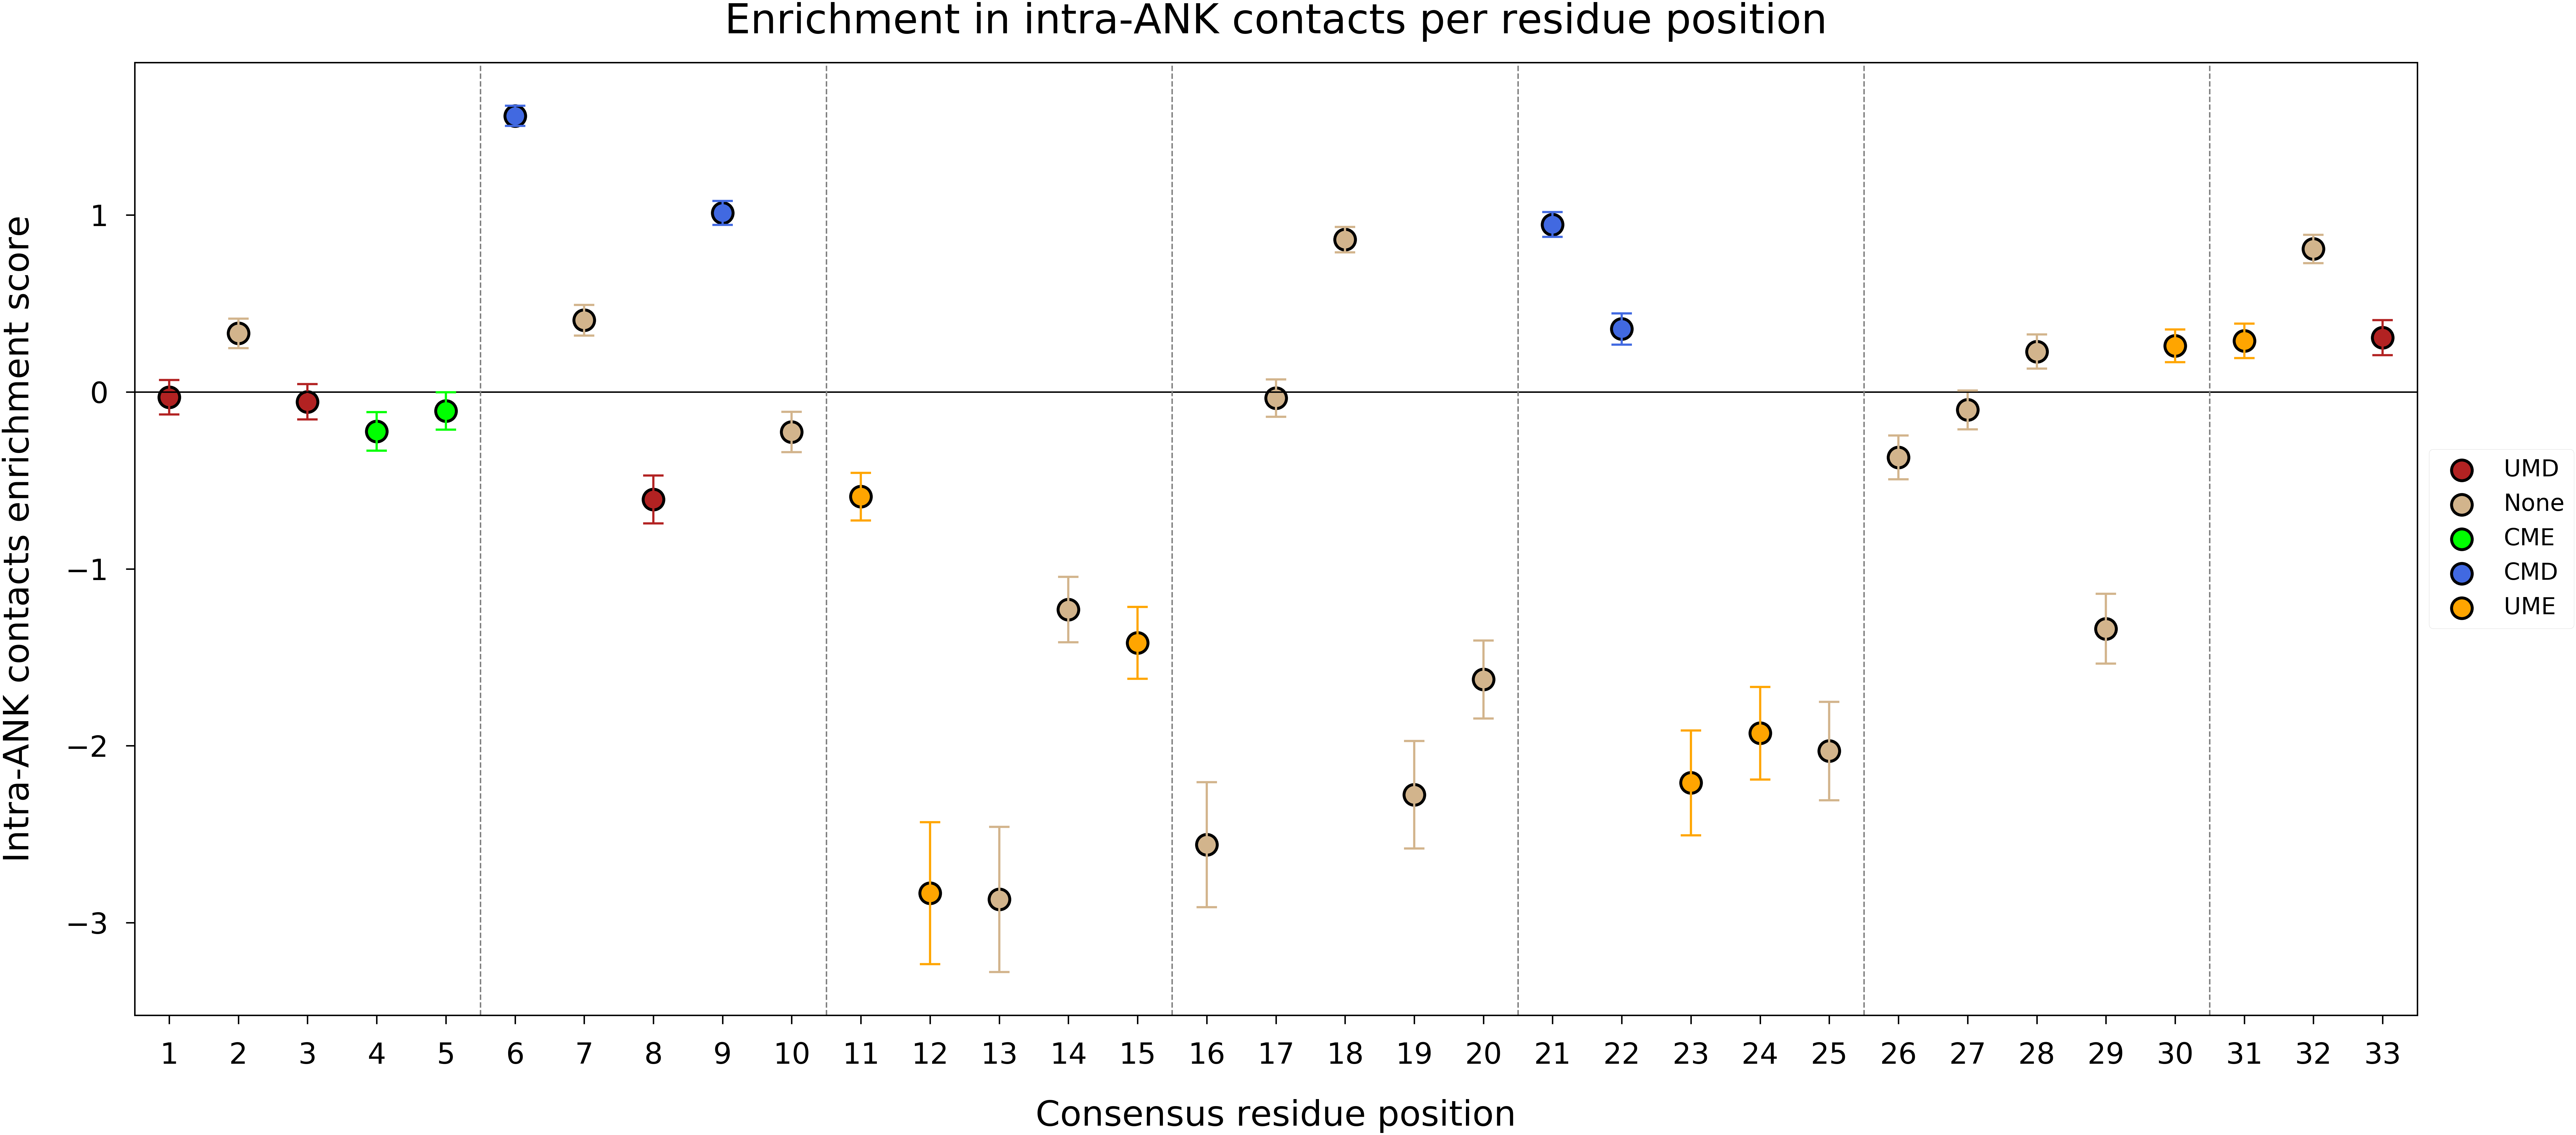

In [28]:
contact_maps.plot_cons_enrichment(enrichment_df_intra, class_col = "class", color_col = "color_class")

## INTER-ANK REPEAT INTERACTIONS

In [11]:
inter_res_occ = contact_maps.get_inter_cons_occ(df_rf, cons_cols_eq)
inter = contact_maps.get_inter_cons(df_rf, cons_cols_eq, df_cols_eq)#, int_mask = "Hydrophobic-Bond")
inter_norm = contact_maps.normalize_contacts(inter, inter_res_occ)

The dataframe contains information of:
36268 residues, 9991 of which are unique
158 PDB structures
69 different proteins
358 unique repeats
289 pairs of ARs were used


In [12]:
contact_maps.plot_inter_cons(inter_norm, "viridis")

In [29]:
occ_inter = contact_maps.get_tot_occ_res(inter_res_occ, len(inter), contact_map = "inter", t = 0) # CALCULATES THE ABSOLUTE STRUCTURAL COVERAGE PER CONSENSUS POSITION
cons_inter = contact_maps.get_tot_cons_res(inter, contact_map = "inter", t = 0) # CALCULATES THE ABSOLUTE NUMBER OF CONTACTS PER CONSENSUS POSITION
enrichment_df_inter = contact_maps.get_OR_from_cons(cons_inter, occ_inter) # CALCULATES OR, LOG(OR), P-VALUE AND 95% CI FOR THE ENRICHMENT IN CONTACTS
enrichment_df_inter = structural_analysis.add_miss_class(enrichment_df_inter) # ADDS MISSENSE ENRICHMENT CLASS

In [31]:
enrichment_df_inter

occ  contacts  oddsratio  log_oddsratio         pvalue   ci_dist class  \
1   15515     372.0   0.464107      -0.767639   1.800345e-60  0.103582   UMD   
2   16162     505.0   0.607136      -0.499003   4.672789e-32  0.089445  None   
3   16404    1016.0   1.227032       0.204598   1.439485e-09  0.064605   UMD   
4   16785    1191.0   1.414392       0.346700   3.224971e-27  0.060116   CME   
5   16867    1584.0   1.901209       0.642490  7.837560e-107  0.053056   CME   
6   16747     631.0   0.734836      -0.308108   5.082272e-15  0.080460   CMD   
7   16806    1071.0   1.264242       0.234473   1.474272e-12  0.063043  None   
8   16923    1068.0   1.251546       0.224380   1.270168e-11  0.063110   UMD   
9   16980     615.0   0.705612      -0.348690   1.169176e-18  0.081418   CMD   
10  16729    1615.0   1.957381       0.671607  1.437749e-117  0.052635  None   
11  16742     849.0   0.997428      -0.002575   9.572731e-01  0.070085   UME   
12  16690     721.0   0.845553      -0.167764   9.209136e-06  0.075598   UME   
13  16686     674.0   0.789190      -0.236749   8.578283e-10  0.078016  None   
14  16406    1113.0   1.349151       0.299476   8.574246e-20  0.062007  None   
15  16123     758.0   0.922568      -0.080595   3.301250e-02  0.073914   UME   
16  16528     362.0   0.422939      -0.860527   4.463301e-76  0.104878  None   
17  16436    1318.0   1.607631       0.474762   2.019061e-52  0.057522  None   
18  16924     738.0   0.853691      -0.158186   2.382654e-05  0.074762  None   
19  16736     414.0   0.478437      -0.737231   3.144064e-61  0.098305  None   
20  16543     938.0   1.119573       0.112947   1.110108e-03  0.066976  None   
21  16628    1078.0   1.286936       0.252264   2.727128e-14  0.062877   CMD   
22  16408     715.0   0.853207      -0.158753   3.136990e-05  0.075919   CMD   
23  16156     234.0   0.278527      -1.278239  1.489944e-127  0.129649   UME   
24  15687     689.0   0.860331      -0.150438   1.107936e-04  0.077312   UME   
25  15185     401.0   0.512063      -0.669308   5.169909e-48  0.099940  None   
26  15440     394.0   0.494432      -0.704345   7.436486e-53  0.100767  None   
27  15276     468.0   0.595483      -0.518383   2.600365e-32  0.092819  None   
28  14768    1201.0   1.628198       0.487474   2.010297e-50  0.060153  None   
29  14410     990.0   1.365066       0.311203   4.259230e-19  0.065615  None   
30  14241     789.0   1.092576       0.088539   1.774816e-02  0.072773   UME   
31  12404     817.0   1.305033       0.266228   2.464070e-12  0.071896   UME   
32  11432     757.0   1.311445       0.271130   6.790606e-12  0.074617  None   
33  10992     388.0   0.689794      -0.371363   5.520723e-14  0.102006   UMD   

   color_class  
1    firebrick  
2          tan  
3    firebrick  
4         lime  
5         lime  
6    royalblue  
7          tan  
8    firebrick  
9    royalblue  
10         tan  
11      orange  
12      orange  
13         tan  
14         tan  
15      orange  
16         tan  
17         tan  
18         tan  
19         tan  
20         tan  
21   royalblue  
22   royalblue  
23      orange  
24      orange  
25         tan  
26         tan  
27         tan  
28         tan  
29         tan  
30      orange  
31      orange  
32         tan  
33   firebrick

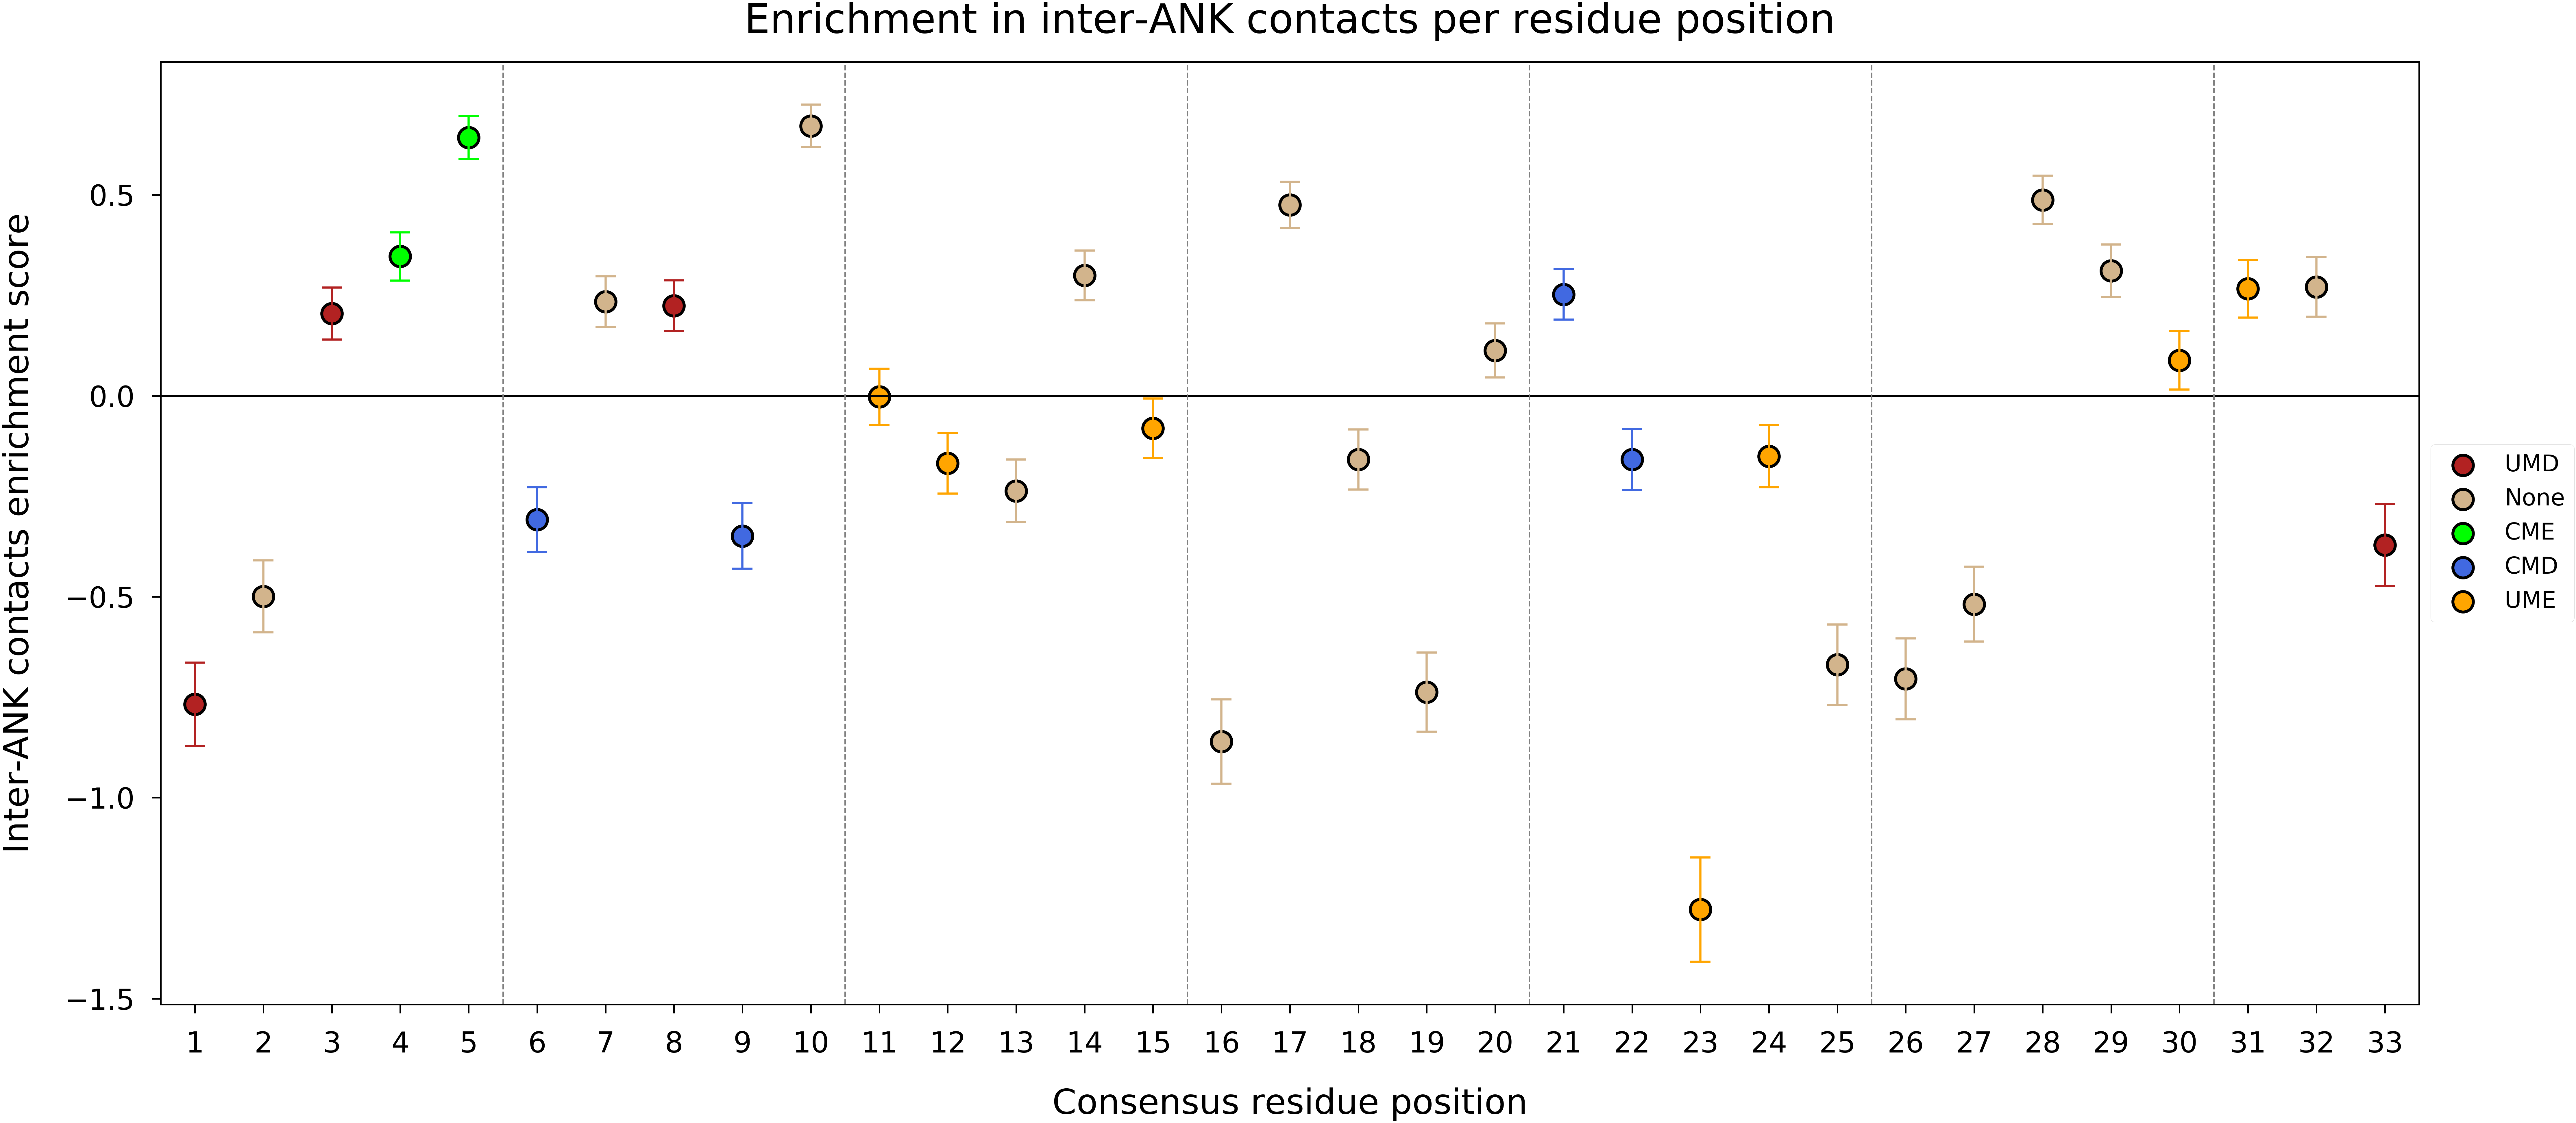

In [30]:
contact_maps.plot_cons_enrichment(enrichment_df_inter, contact_map = "Inter", class_col = "class", color_col = "color_class")